In [1]:
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [63]:
import h5py
with h5py.File('catvsdog.h5','a') as PSL_handle:
    X_train = PSL_handle["X_train"][:]
    X_test = PSL_handle["X_test"][:]
    Y_train = PSL_handle["Y_train"][:]
    Y_test = PSL_handle["Y_test"][:]
print("Shape of Data \n Training Data:{} Training Labels:{} \n Testing Data:{}\
Tesing Labels: {}".format(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape))

Shape of Data 
 Training Data:(231, 100, 100, 3) Training Labels:(231,) 
 Testing Data:(100, 100, 100, 3)Tesing Labels: (100,)


(30000,)


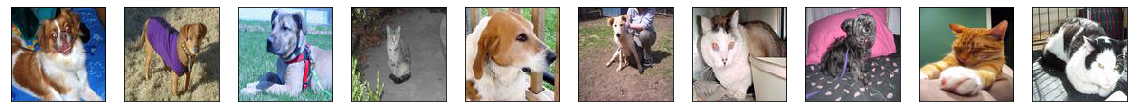

In [68]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [64]:
print("Previous X_train shape: {}".format(X_train.shape))
X_train = X_train.reshape(X_train.shape[0], -1) 
print("Previous X_train shape: {}".format(X_train.shape))
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')
print(X_train[0])

Previous X_train shape: (231, 100, 100, 3)
Previous X_train shape: (231, 30000)
[0.36078432 0.3137255  0.32156864 ... 0.76862746 0.7411765  0.6784314 ]


In [69]:
from keras.optimizers import SGD
input_size = 30000
batch_size = 8   
hidden = 5
#hidden2 = 20
epochs = 10

In [70]:
sgd = SGD(lr=0.001)
model = Sequential()     
model.add(Dense(10, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
# Compilation
model.compile(loss='binary_crossentropy', 
    metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                300010    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 300,021
Trainable params: 300,021
Non-trainable params: 0
_________________________________________________________________


In [71]:
from time import time
tic = time()
model.fit(X_train, Y_train, batch_size=16, epochs=100, verbose=1, validation_split=0.2)
toc = time()
print("Training took {} milisec :".format ((toc-tic)*100))

Train on 184 samples, validate on 47 samples
Epoch 1/100
184/184 [==============================] - 2s 8ms/step - loss: 0.7175 - accuracy: 0.4728 - val_loss: 0.6827 - val_accuracy: 0.5957
Epoch 2/100
184/184 [==============================] - 0s 597us/step - loss: 0.7036 - accuracy: 0.5326 - val_loss: 0.6703 - val_accuracy: 0.5745
Epoch 3/100
184/184 [==============================] - 0s 659us/step - loss: 0.6984 - accuracy: 0.4783 - val_loss: 0.6959 - val_accuracy: 0.4255
Epoch 4/100
184/184 [==============================] - 0s 706us/step - loss: 0.6790 - accuracy: 0.5543 - val_loss: 0.6814 - val_accuracy: 0.4894
Epoch 5/100
184/184 [==============================] - 0s 619us/step - loss: 0.6764 - accuracy: 0.5652 - val_loss: 0.6845 - val_accuracy: 0.5106
Epoch 6/100
184/184 [==============================] - 0s 635us/step - loss: 0.6633 - accuracy: 0.5978 - val_loss: 0.7123 - val_accuracy: 0.4255
Epoch 7/100
184/184 [==============================] - 0s 668us/step - loss: 0.6452 - a

Epoch 57/100
184/184 [==============================] - 0s 641us/step - loss: 0.3715 - accuracy: 0.8859 - val_loss: 0.8808 - val_accuracy: 0.4043
Epoch 58/100
184/184 [==============================] - 0s 614us/step - loss: 0.3399 - accuracy: 0.8967 - val_loss: 0.8708 - val_accuracy: 0.5106
Epoch 59/100
184/184 [==============================] - 0s 587us/step - loss: 0.3544 - accuracy: 0.8804 - val_loss: 0.8853 - val_accuracy: 0.4043
Epoch 60/100
184/184 [==============================] - 0s 511us/step - loss: 0.3391 - accuracy: 0.9076 - val_loss: 0.8631 - val_accuracy: 0.4681
Epoch 61/100
184/184 [==============================] - 0s 699us/step - loss: 0.3399 - accuracy: 0.9130 - val_loss: 0.8702 - val_accuracy: 0.4681
Epoch 62/100
184/184 [==============================] - 0s 689us/step - loss: 0.3351 - accuracy: 0.9185 - val_loss: 0.8776 - val_accuracy: 0.4255
Epoch 63/100
184/184 [==============================] - 0s 863us/step - loss: 0.3320 - accuracy: 0.9239 - val_loss: 0.8754 -

In [73]:
score = model.evaluate(X_test,Y_test)
print("Test Accuracy: {}".format(score[1]))


100/100 [==============================] - 0s 270us/step
Test Accuracy: 0.5799999833106995
[0.8011808633804322, 0.5799999833106995]


100/100 [==============================] - 0s 260us/step

Test accuracy: 0.5799999833106995
[1 0 1 1 1 1 0 0 0 1]


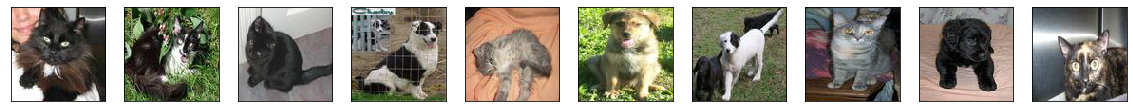

In [85]:

import numpy as np
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(20,30)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(np.squeeze(y_pred))
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()